In [214]:
import numpy as np
import IPython
import librosa

from scipy import signal as sp
from scipy.io import wavfile
from math import pi
from scipy.fftpack import fft
from scipy.fftpack import fftshift
from scipy.interpolate import interp1d as itp
import math
import cmath as cm

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import sounddevice as sd
from scipy.io.wavfile import write
#from plot_zplane import zplane

%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 24})

def plot_signal(x, xaxis_label=None,yaxis_label=None, save=None):
    plt.plot(x)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    
    if save:
        plt.savefig(save + '.pdf', format='pdf')
    
    return

def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k



In [215]:
a=3

7
0.02778718991991098
[2.49149648e-10 1.74404753e-09 5.23214260e-09 8.72023766e-09
 8.72023766e-09 5.23214260e-09 1.74404753e-09 2.49149648e-10]
[  1.          -6.60771277  18.72268817 -29.48825045  27.88118554
 -15.82519673   4.99267618  -0.67538991]
TransferFunctionContinuous(
array([2.49149648e-10, 1.74404753e-09, 5.23214260e-09, 8.72023766e-09,
       8.72023766e-09, 5.23214260e-09, 1.74404753e-09, 2.49149648e-10]),
array([  1.        ,  -6.60771277,  18.72268817, -29.48825045,
        27.88118554, -15.82519673,   4.99267618,  -0.67538991]),
dt: None
)


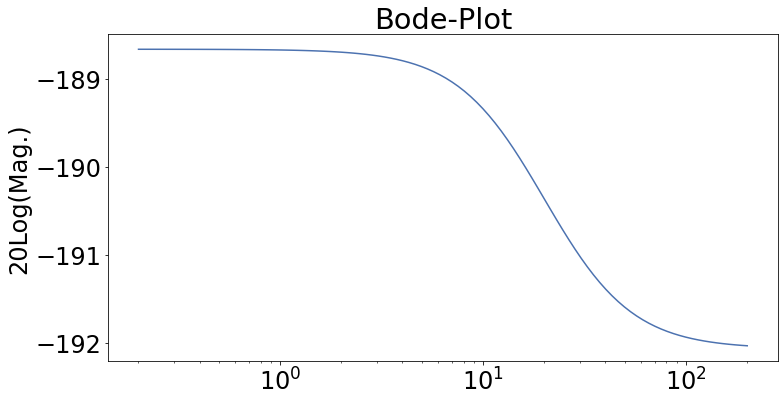

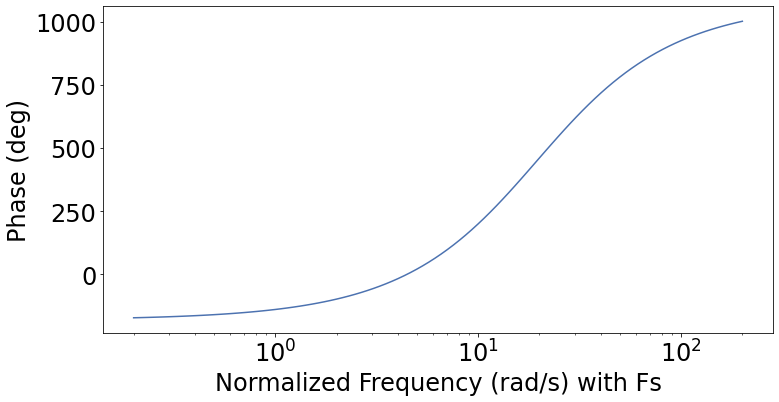

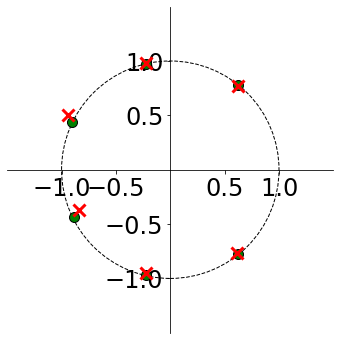

[-1.01060349+0.j         -1.00659644+0.00829374j -1.00659644-0.00829374j
 -0.99762799+0.01031285j -0.99762799-0.01031285j -0.99047382+0.0045786j
 -0.99047382-0.0045786j ]
[0.97723328+0.08338164j 0.97723328-0.08338164j 0.94483191+0.06464984j
 0.94483191-0.06464984j 0.92363918+0.03507316j 0.92363918-0.03507316j
 0.91630403+0.j        ]
2.491496475002625e-10


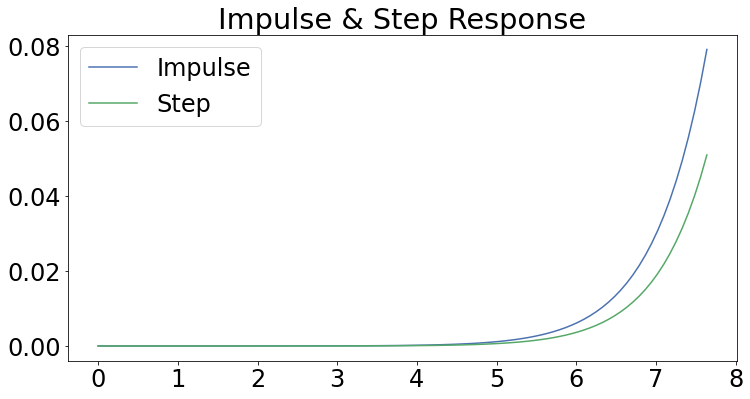

In [226]:
#Problem 1

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    



Fs=720
Fpass=10
Fstop=20
ripple_p=3
s_attenuate=40

wp=Fpass/(Fs/2)
ws=Fstop/(Fs/2)

g_stop=40
g_pass=3

N, Wn = sp.buttord(wp, ws, g_pass, g_stop, analog=False)
print(N)
print(Wn)
#N=7
#Wn=0.028

b, a = sp.butter(N, Wn, 'low', False)
#z, p = sp.bilinear(b, a, g_pass)
#print(z)
#print(p)
print(b)
print(a)
sys1 = sp.TransferFunction(b,a)
print(sys1)
w,mag,phase=sp.bode(sys1)

plt.figure()
plt.semilogx(w*Wn*Fs, mag); plt.title('Bode-Plot') ; plt.ylabel('20Log(Mag.)')   # Bode magnitude plot
plt.figure()
plt.semilogx(w*Wn*Fs, phase) ;plt.xlabel('Normalized Frequency (rad/s) with Fs');plt.ylabel('Phase (deg)') # Bode phase plot
plt.show()

zero,pole,k= sp.tf2zpk(b,a)

zplane(zero, pole)

print(zero)
print(pole)
print(k)

t1,y1=sp.impulse(sys1)
plt.figure()
plt.plot(t1,y1,label="Impulse");
t2,y2=sp.step(sys1)
plt.plot(t2,y2,label="Step");plt.title("Impulse & Step Response")
plt.legend(loc="upper left")



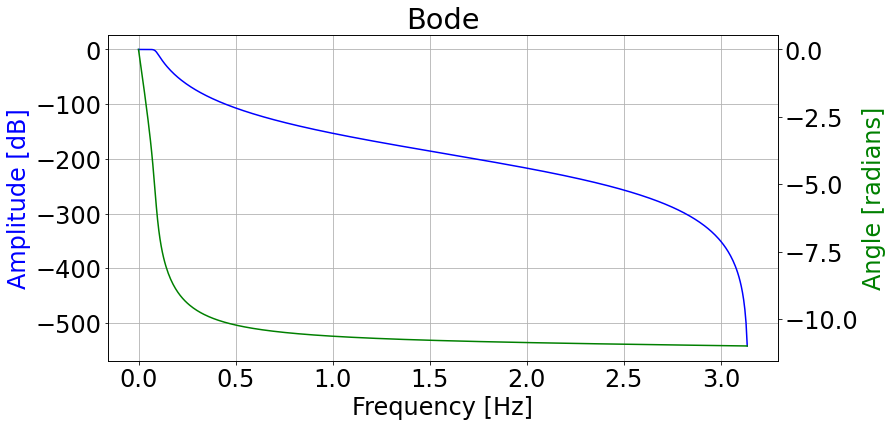

In [224]:
#Problem 1
z, p, k = sp.butter(7, 0.028, output='zpk')
w, h = sp.freqz_zpk(z, p, k)

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Bode')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.grid()

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle [radians]', color='g')

plt.axis('tight')
plt.show()

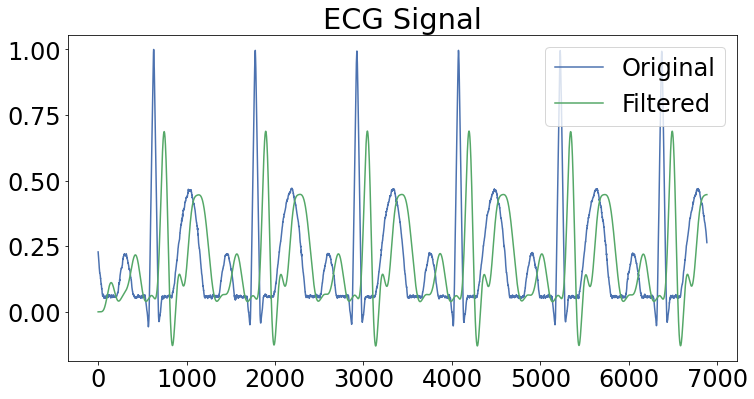

In [172]:
#Problem 2

def butter_low(highcut, fs, order):
    nyq = 0.5 * fs
    #low = lowcut / nyq
    high = highcut / nyq
    b, a = sp.butter(order,high, btype='low')
    return b, a


def butter_lowpass_filter(data, highcut, fs, order):
    b, a = butter_lowpass(highcut, fs,order)
    y = sp.lfilter(b, a, data)
    return y

A =np.loadtxt("ECG_Data.txt")
plt.plot(A, label="Original");plt.title("ECG Signal")

y1= butter_lowpass_filter(A,5,720,7)
plt.plot(y1, label="Filtered")
plt.legend(loc="upper right")

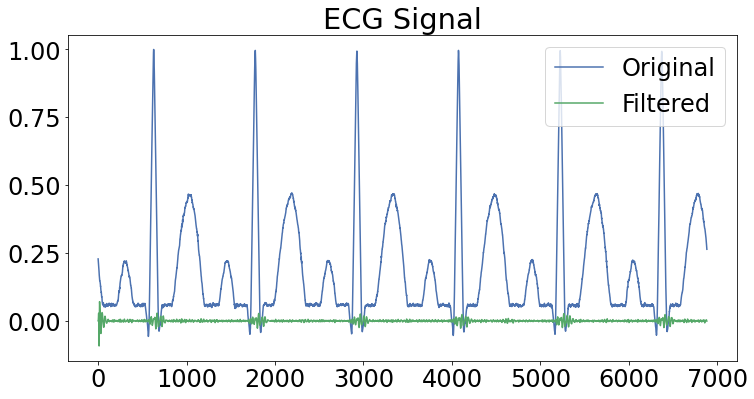

In [187]:
#Problem 2

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = sp.butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sp.lfilter(b, a, data)
    return y

A =np.loadtxt("ECG_Data.txt")
plt.plot(A, label="Original");plt.title("ECG Signal")

y1= butter_bandpass_filter(A,20,100,720,7)
plt.plot(y1, label="Filtered")
plt.legend(loc="upper right")

11025
[ 0.00016569  0.         -0.00049706  0.          0.00049706  0.
 -0.00016569]
[  1.          -5.32755811  12.2398641  -15.47268967  11.34343167
  -4.5758426    0.79605645]


<Figure size 864x432 with 0 Axes>

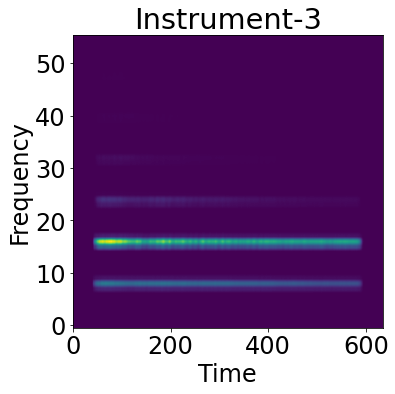

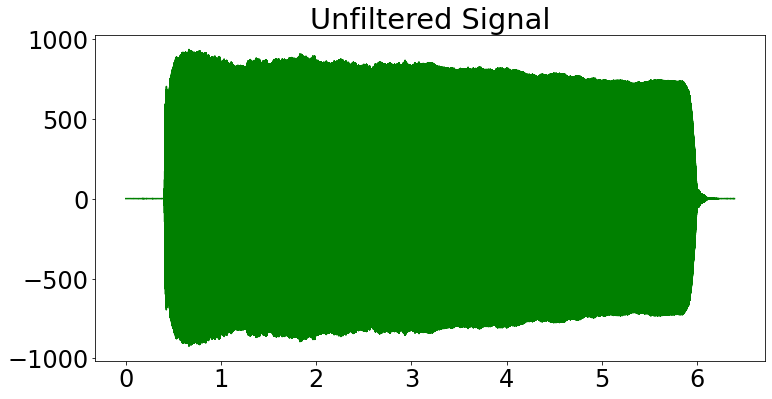

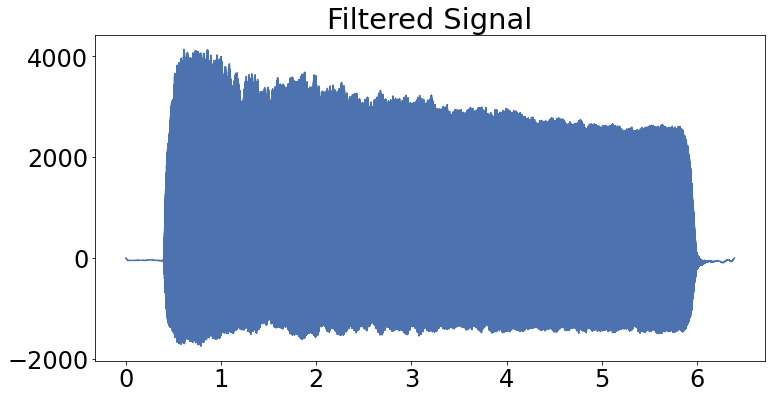

<Figure size 864x432 with 0 Axes>

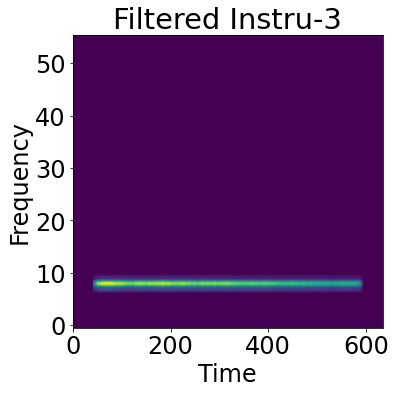

In [198]:
#Problem 3

def spec_plot(x,window,overlap,title):
    freqs, times, spectrogram = scipy.signal.spectrogram(x,100,window=window,noverlap=overlap)
    plt.figure(figsize=(6,6))
    plt.imshow(spectrogram,origin='lower',aspect='auto') #aspect='auto', cmap='hot_r', origin='lower')
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel('Time')
    plt.tight_layout()
    
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = sp.butter(order, [low, high], btype='band')
    print(b)
    print(a)
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sp.lfilter(b, a, data)
    return y

import scipy
Fs1 , data1= wavfile.read('instru3.wav')
print(Fs1)
w=np.hamming(111)
plt.figure()
spec_plot(data,w,0,'Instrument-3')
#IPython.display.Audio(data, rate=11025)



#b,a = butter_bandpass(1200,1800,11025,10)
#print(b)
#print(a)
y= butter_bandpass_filter(data1,600,800,11025,)
n=np.linspace(0,70504,70504)
plt.figure()
plt.plot(n/11025,y,'g');plt.title("Unfiltered Signal")
plt.figure()
plt.plot(n/11025,data1);plt.title("Filtered Signal")
plt.figure()
spec_plot(y,w,0,'Filtered Instru-3')

IPython.display.Audio(y,rate=11025)
write("Filtered_instru3.wav", 11025, y.astype(np.float32))
IPython.display.Audio(y,rate=11025)
#IPython.display.Audio(data1,rate=11025)

5
0.027777777777777776


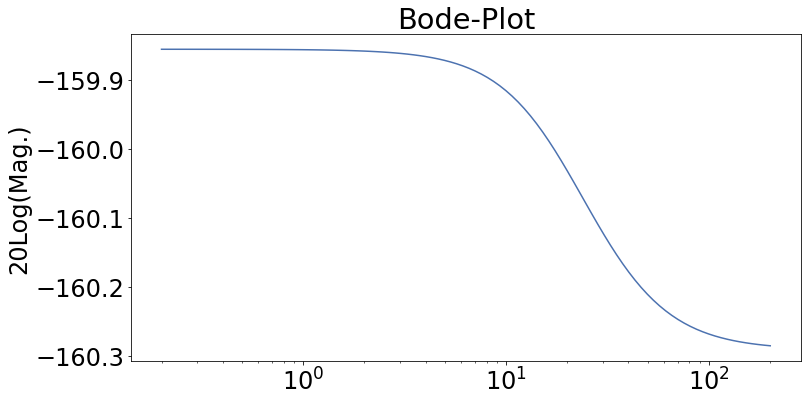

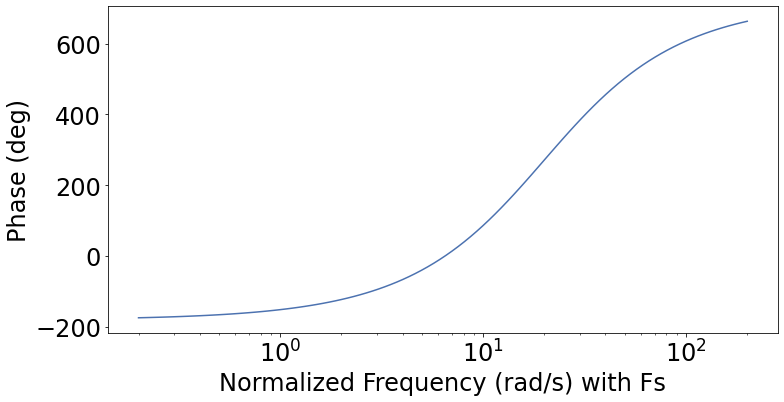

In [227]:
Fs=720
Fpass=10
Fstop=20
ripple_p=3
s_attenuate=40

wp=Fpass/(Fs/2)
ws=Fstop/(Fs/2)

g_stop=40
g_pass=3

N1, Wn1 = sp.cheb1ord(wp, ws, g_pass, g_stop, analog=False)
print(N1)
print(Wn1)

b1,a1 = sp.cheby1(N1,3,Wn1,btype='low', analog=False)


sys2 = sp.TransferFunction(b1,a1)
w1,mag1,phase1=sp.bode(sys2)

plt.figure()
plt.semilogx(w1*Wn1*Fs, mag1); plt.title('Bode-Plot') ; plt.ylabel('20Log(Mag.)')   # Bode magnitude plot
plt.figure()
plt.semilogx(w1*Wn1*Fs, phase1) ;plt.xlabel('Normalized Frequency (rad/s) with Fs');plt.ylabel('Phase (deg)') # Bode phase plot
plt.show()


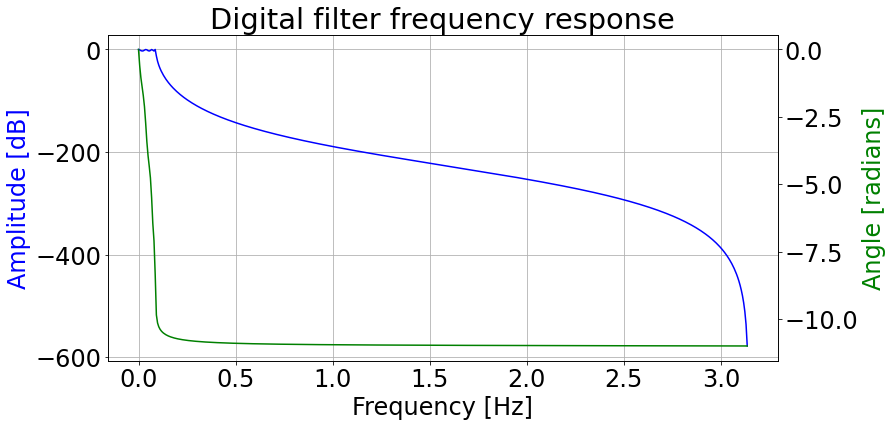

In [228]:
#Problem 4
z, p, k = sp.cheby1(7,3,0.028, output='zpk')
w, h = sp.freqz_zpk(z, p, k)

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Digital filter frequency response')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.grid()

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle [radians]', color='g')

plt.axis('tight')
plt.show()